# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Malvin Subahri 

Batch : FTDS - 012

Dataset : collage.csv

Objective : Membuat model untuk memprediksi apakah seseorang akan melanjutkan kuliah atau tidak setelah lulus sekolah

Problem Statement : Memprediksi apakah seseorang akan melanjutkan kuliah atau tidak setelah lulus sekolah

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import warnings
warnings.filterwarnings ('ignore')

# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
pd.set_option("display.max.column", None)
data = pd.read_csv ('collage.csv')
data

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


In [3]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


Tidak ada missing values pada dataset

In [4]:
# Duplicate Dataset

data_copy = data.copy ()

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [5]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


<AxesSubplot:xlabel='will_go_to_college'>

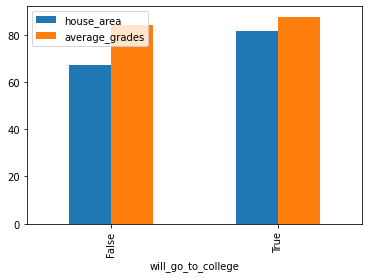

In [6]:
data.groupby (by=['will_go_to_college'])[['house_area', 'average_grades']].mean ().plot(kind='bar')

<AxesSubplot:xlabel='will_go_to_college'>

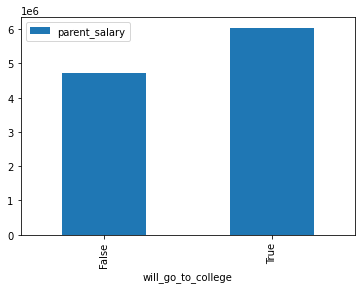

In [7]:
data.groupby (by=['will_go_to_college'])[['parent_salary']].mean ().plot(kind='bar')

Jika dilihat dari grafik, orang yang lanjut kuliah memiliki rata - rata house_area, average_grades, parent_salary yang lebih besar

In [8]:
data.groupby (by=['will_go_to_college'])[['average_grades', 'parent_salary']].describe ()

average_grades                                             \
                            count      mean       std    min     25%     50%   
will_go_to_college                                                             
False                       500.0  84.39134  2.071169  77.18  83.095  84.445   
True                        500.0  87.80306  3.568375  75.00  85.410  87.640   

                                   parent_salary                           \
                        75%    max         count       mean           std   
will_go_to_college                                                          
False               85.6375  90.97         500.0  4717100.0  1.247334e+06   
True                90.2800  98.00         500.0  6046040.0  1.212242e+06   

                                                                            
                          min        25%        50%        75%         max  
will_go_to_college                                                          
False               1660000.0  3780000.0  4650000.0  5652500.0   8370000.0  
True                1000000.0  5315000.0  6060000.0  6732500.0  10000000.0

Jika dilihat dari nilai rata - rata, orang yang lanjut kuliah memiliki average_grades sebesar 87 dan parent_salary sebesar 6000000

Jika dilihat dari nilai minimal, orang yang lanjut kuliah memiliki average_grades sebesar 75 mungkin ini standar nilai rata-rata agar bisa lanjut kuliah dan parent_salary sebesar 1000000 mungkin ini standar biaya agar bisa membayar perkuliahan

Dan ternyata orang yang mempunyai average_grades dan parent_salary yang lebih dari minimal belum tentu lanjut kuliah 

Text(0.5, 1.0, 'interest vs will_go_to_college')

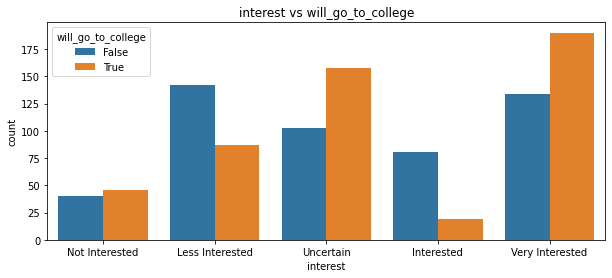

In [9]:
plt.figure (figsize=(10,4))
sns.countplot (data=data, x='interest', hue='will_go_to_college', order=['Not Interested', 'Less Interested', 'Uncertain', 'Interested', 'Very Interested'])
plt.title ('interest vs will_go_to_college')

Ternyata orang yang mempunyai `interest` tinggi, kenyataanya belum tentu lanjut kuliah, bisa dilihat pada kasus `Interested` yang seharusnya berminat lanjut kuliah tetapi pada kenyataannya lebih banyak yang tidak lanjut kuliah

Namun orang yang mempunyai `interest` rendah, kenyataanya belum tentu tidak lanjut kulia, bisa dilihat pada kasus `Not Interested` yang seharusnya tidak berminat lanjut kuliah tetapi pada kenyataanya lebih banyak yang lanjut kuliah 

Text(0.5, 1.0, 'parent_was_in_college vs will_go_to_college')

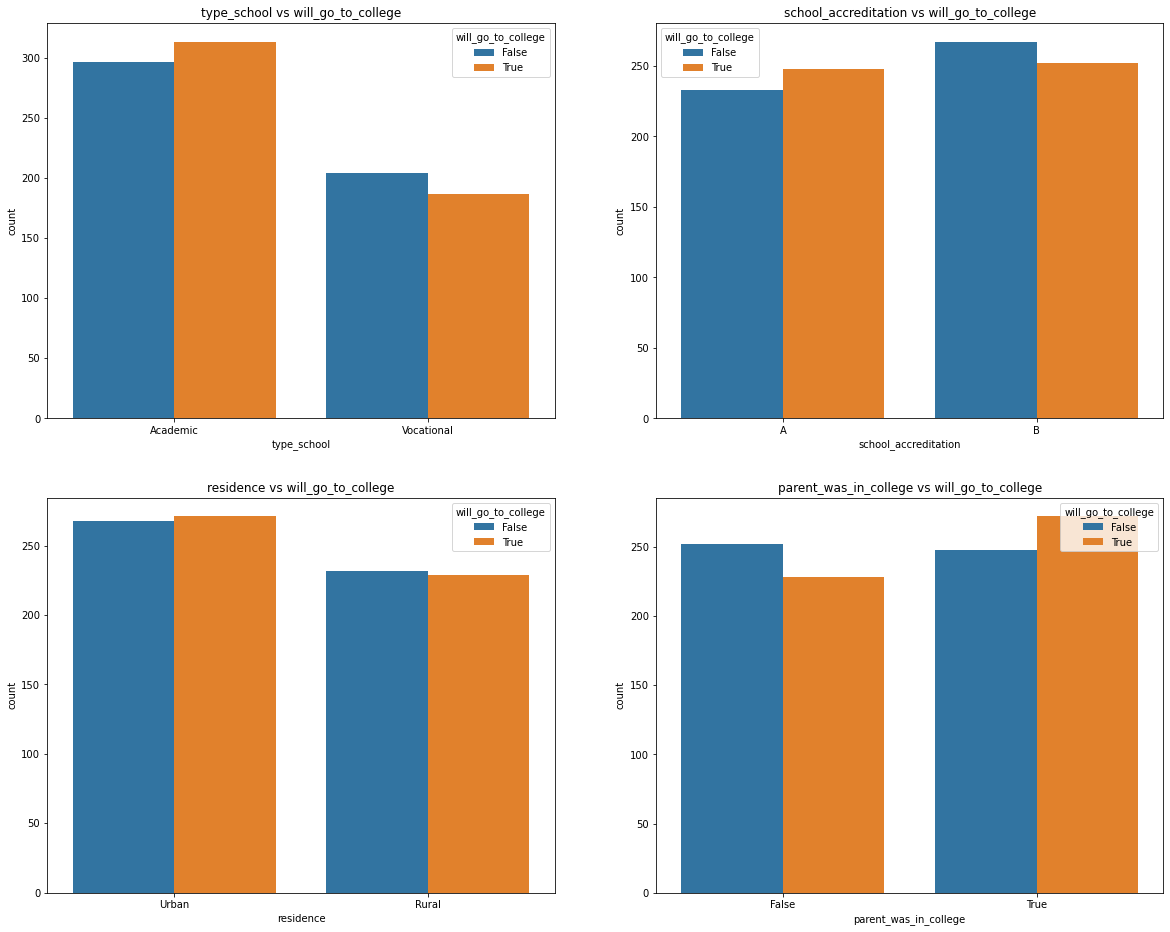

In [10]:
plt.figure (figsize=(20,16))

# Korelasi Kolom 'type_school' dengan kolom 'will_go_to_college

plt.subplot(2, 2, 1)
sns.countplot (data=data, x='type_school', hue='will_go_to_college')
plt.title ('type_school vs will_go_to_college')

# Korelasi Kolom 'school_accreditation' dengan kolom 'will_go_to_college

plt.subplot(2, 2, 2)
sns.countplot (data=data, x='school_accreditation', hue='will_go_to_college')
plt.title ('school_accreditation vs will_go_to_college')

# Korelasi Kolom 'residence' dengan kolom 'will_go_to_college

plt.subplot(2, 2, 3)
sns.countplot (data=data, x='residence', hue='will_go_to_college')
plt.title ('residence vs will_go_to_college')

# Korelasi Kolom 'parent_was_in_college' dengan kolom 'will_go_to_college

plt.subplot(2, 2, 4)
sns.countplot (data=data, x='parent_was_in_college', hue='will_go_to_college')
plt.title ('parent_was_in_college vs will_go_to_college')

`Korelasi Kolom 'type_school' dengan kolom 'will_go_to_college'`

Ternyata lebih banyak orang yang bersekolah di sekolah academic dibandingkan sekolah vocational, orang yang lanjut kuliah juga lebih banyak yang dari sekolah academic dibandingkan dengan sekolah vocational

`Korelasi Kolom 'school_accreditation' dengan kolom 'will_go_to_college'`

Orang yang bersekolah di sekolah dengan akreditasi A lebih banyak yang lanjut kuliah daripada yang tidak lanjut kuliah, sedangkan orang yang bersekolah di sekolah dengan akreditasi B lebih banyak yang tidak lanjut kuliah daripada yang lanjut kuliah

`Korelasi Kolom 'residence' dengan kolom 'will_go_to_college'`

Orang yang tinggal di Urban (perkotaan) lebih banyak yang lanjut kuliah dibandingkan dengan orang yang tinggal di Rural (pedesaan)

`Korelasi Kolom 'parent_was_in_college' dengan kolom 'will_go_to_college'`

Murid dengan orang tua yang dulunya kuliah lebih banyak yang lanjut kuliah daripada yang tidak lanjut kuliah, sedangkan murid dengan orang tua yang dulunya tidak kuliah lebih banyak yang tidak lanjut kuliah daripada yang lanjut kuliah

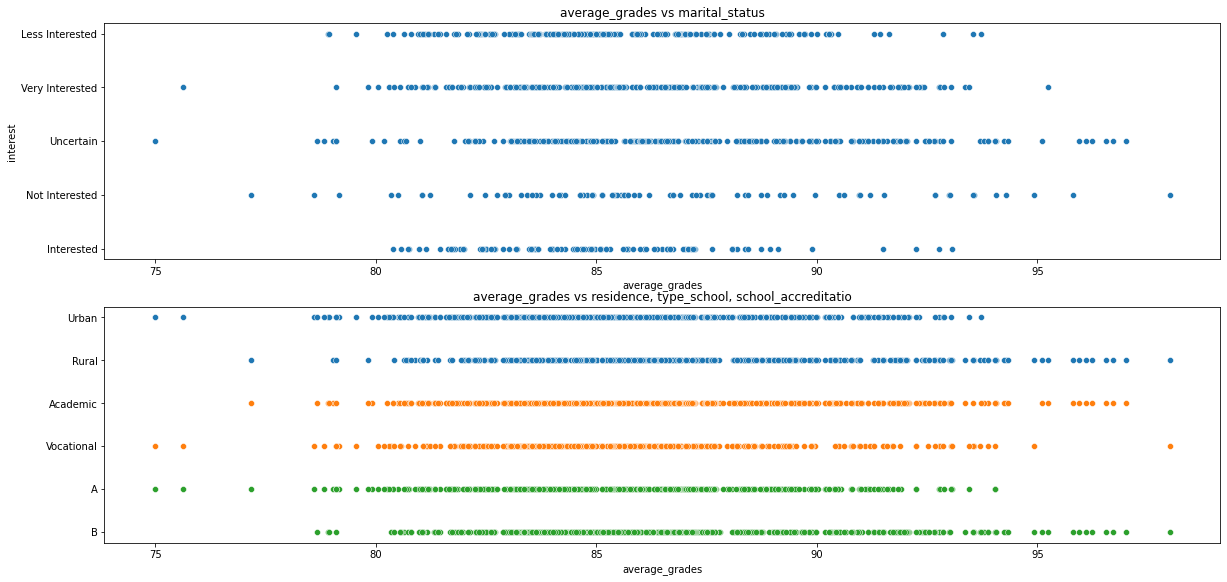

In [11]:
plt.figure(figsize = (20, 20))

# Mencari korelasi kolom 'average_grades' dengan kolom 'marital_status'

plt.subplot(4, 1, 1)
sns.scatterplot(x = 'average_grades', y = 'interest', data = data)
plt.title('average_grades vs marital_status')

# Mencari korelasi kolom 'average_grades' dengan kolom 'residence, type_school, school_accreditation'

plt.subplot(4, 1, 2)
sns.scatterplot(x = 'average_grades', y = 'residence', data = data)
sns.scatterplot(x = 'average_grades', y = 'type_school', data = data)
sns.scatterplot(x = 'average_grades', y = 'school_accreditation', data = data)
plt.ylabel('')
plt.title('average_grades vs residence, type_school, school_accreditatio')

plt.show()


`Korelasi kolom 'average_grades' dengan kolom 'marital_status'`

Ternyata orang yang `Very Interested` untuk lanjut kuliah tidak memiliki rata-rata nilai yang tinggi, melainkan orang yang `Not Interested` untuk lanjut kuliah memiliki rata-rata nilai yang lebih tinggi

`Korelasi kolom 'average_grades' dengan kolom 'residence, type_school, school_accreditation'`

Orang yang tinggal di Rural (pedesaan) memiliki rata-rata nilai yang lebih tinggi

Orang yang bersekolah di sekolah Academic memiliki rata-rata nilai yang lebih tingg

Orang yang bersekolah di sekolah dengan akreditasi B memiliki rata-rata nilai yang lebih tinggi

<AxesSubplot:ylabel='will_go_to_college'>

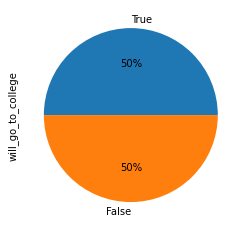

In [12]:
data['will_go_to_college'].value_counts().plot (kind = 'pie', autopct='%1.0f%%')

Jika dilihat dari `will_go_to_college` dapat diketahui bahwa dataset kita balance karena perbandingan datanya 50% : 50%

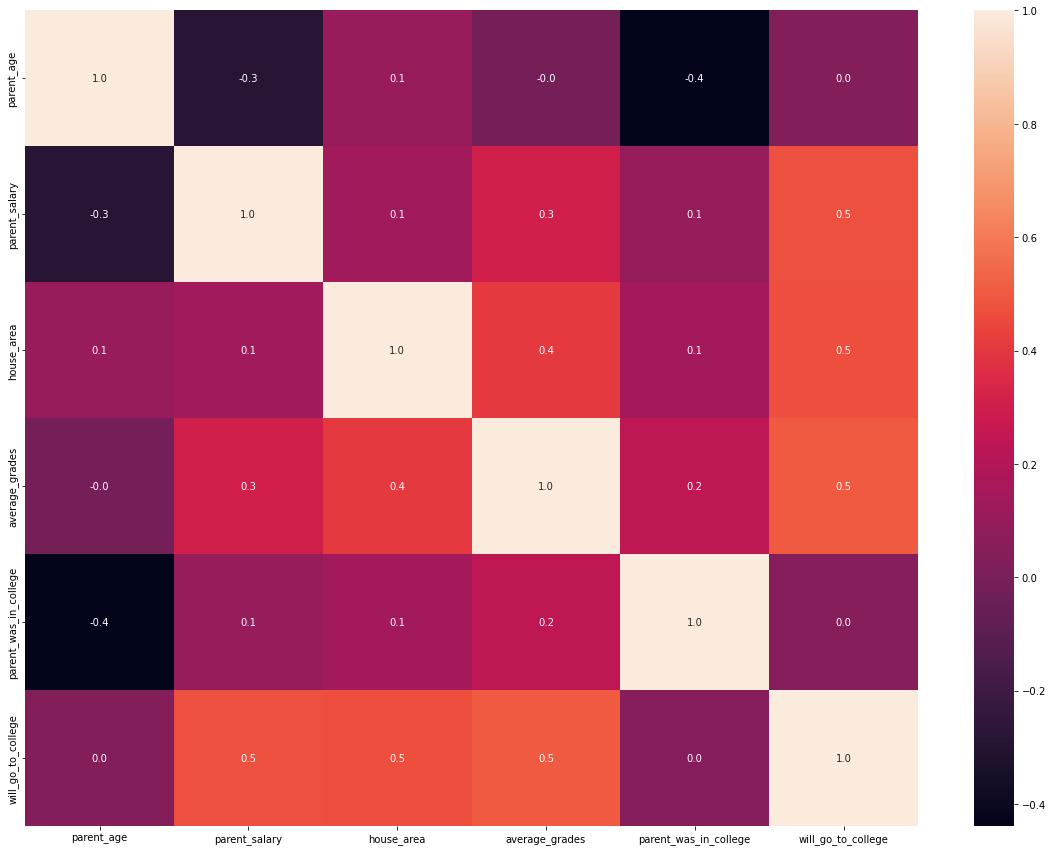

In [13]:
# Mencari korelasi kolom will_go_to_college dengan heatmap

plt.figure(figsize=(20, 15))
sns.heatmap(data.corr (), annot = True, fmt = '.1f')
plt.show()

Dari heatmap yang memiliki korelasi dengan `will_go_to_college` adalah `parent_salary, house_area, average_grades`

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



## Get Data For Model Inference

In [14]:
# Get Data For Model Inference

data_inf = data.sample (10, random_state = 21)
data_inf

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
492,Academic,B,Female,Very Interested,Rural,50,7540000,96.5,91.84,True,True
383,Academic,B,Male,Not Interested,Urban,55,5010000,86.3,82.13,False,True
856,Vocational,A,Male,Interested,Rural,45,7370000,79.2,86.31,True,True
834,Academic,B,Female,Uncertain,Rural,45,6270000,71.0,89.08,True,True
603,Vocational,A,Female,Very Interested,Urban,53,5420000,79.0,87.37,False,True
712,Academic,B,Male,Less Interested,Urban,57,5080000,88.1,83.57,False,False
126,Academic,B,Male,Not Interested,Rural,46,7200000,76.0,92.99,True,True
290,Academic,A,Female,Uncertain,Urban,58,5060000,62.1,88.85,False,False
549,Vocational,B,Male,Uncertain,Urban,57,4030000,77.8,83.34,True,False
169,Academic,B,Female,Less Interested,Urban,50,3360000,63.5,84.98,True,False


In [15]:
# Remove Inference - Set from Dataset

data_train_test = data.drop (data_inf.index)
data_train_test

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


In [16]:
# Reset Index

data_train_test.reset_index (drop = True, inplace = True)
data_inf.reset_index (drop = True, inplace = True)
data_inf

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,B,Female,Very Interested,Rural,50,7540000,96.5,91.84,True,True
1,Academic,B,Male,Not Interested,Urban,55,5010000,86.3,82.13,False,True
2,Vocational,A,Male,Interested,Rural,45,7370000,79.2,86.31,True,True
3,Academic,B,Female,Uncertain,Rural,45,6270000,71.0,89.08,True,True
4,Vocational,A,Female,Very Interested,Urban,53,5420000,79.0,87.37,False,True
5,Academic,B,Male,Less Interested,Urban,57,5080000,88.1,83.57,False,False
6,Academic,B,Male,Not Interested,Rural,46,7200000,76.0,92.99,True,True
7,Academic,A,Female,Uncertain,Urban,58,5060000,62.1,88.85,False,False
8,Vocational,B,Male,Uncertain,Urban,57,4030000,77.8,83.34,True,False
9,Academic,B,Female,Less Interested,Urban,50,3360000,63.5,84.98,True,False


## Feature Selection

In [17]:
# Display data_train_test

data_train_test

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
985,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
986,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
987,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
988,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


## Splitting Dataset


In [18]:
data

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


Berdasarkan hasil EDA jika dilihat dari heatmap kolom yang memiliki korelasi dengan `will_go_to_college` adalah `parent_salary, house_area, average_grades`

Berdasarkan hasil EDA dan personal judgement, kolom `type_school, school_accreditation, interest, residence` juga memiliki pengaruh terhadap `will_go_to_college` oleh karena itu kita memilih kolom tersebut ke dalam Feature Selection

In [19]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test[['type_school', 'school_accreditation', 'interest', 'residence', 'parent_salary', 'house_area', 'average_grades']]
y = data_train_test[['will_go_to_college']]

In [20]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (792, 7)
Test Size :  (198, 7)


## Handling Outliers

In [21]:
print ('Skewness : ', X_train['parent_salary'].skew ())
print ('Skewness : ', X_train['house_area'].skew ())
print ('Skewness : ', X_train['average_grades'].skew ())

Skewness :  -0.011888775989169703
Skewness :  -0.24314296858731585
Skewness :  0.48417805911805517


Jika dilihat dari skewnessnya, semua kolom distribusi datanya adalah distribusi normal karena skewnessnya berada di rentang -0.5 - 0.5

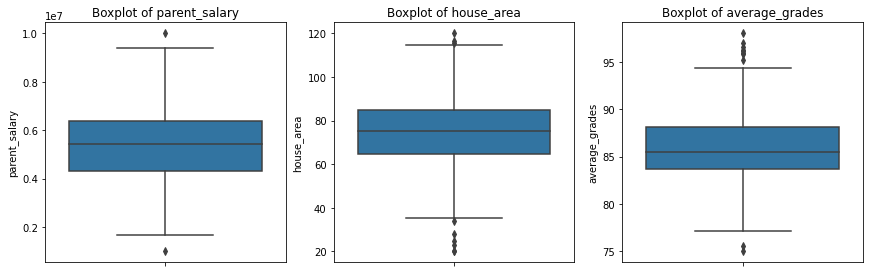

In [22]:
# Cek outliers menggunakan boxplot

plt.figure(figsize = (25, 15))

plt.subplot(3, 5, 1)
sns.boxplot(y = X_train['parent_salary'])
plt.title('Boxplot of parent_salary')

plt.subplot(3, 5, 2)
sns.boxplot(y = X_train['house_area'])
plt.title('Boxplot of house_area')

plt.subplot(3, 5, 3)
sns.boxplot(y = X_train['average_grades'])
plt.title('Boxplot of average_grades')

plt.show ()

Hasil dari boxplot menunjukan bahwa terdapat outliers pada kolom tersebut

### Handling Outliers Menggunakan Teknik Capping Dengan Winsorizer

In [23]:
# Create the capper

winsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                         tail='both', # cap left, right or both tails 
                         fold=1.5, # fold 1.5 because skew (skewness > 0.5)
                         variables=['parent_salary', 'house_area', 'average_grades'])

winsoriser.fit(X_train)

X_train_cap = winsoriser.transform(X_train)

In [24]:
# Check Dataset Before & After Capping

print('Boston Dataframe - Before Capping')
print(X_train.describe())
print('')
print('Boston Dataframe - After Capping')
print(X_train_cap.describe())

Boston Dataframe - Before Capping
       parent_salary  house_area  average_grades
count   7.920000e+02  792.000000      792.000000
mean    5.371717e+06   74.389899       86.039306
std     1.411383e+06   15.511242        3.396060
min     1.000000e+06   20.000000       75.000000
25%     4.330000e+06   64.475000       83.707500
50%     5.430000e+06   75.300000       85.490000
75%     6.372500e+06   84.725000       88.137500
max     1.000000e+07  120.000000       98.000000

Boston Dataframe - After Capping
       parent_salary  house_area  average_grades
count   7.920000e+02  792.000000      792.000000
mean    5.371342e+06   74.450631       86.027809
std     1.408174e+06   15.280086        3.336966
min     1.266250e+06   34.100000       77.062500
25%     4.330000e+06   64.475000       83.707500
50%     5.430000e+06   75.300000       85.490000
75%     6.372500e+06   84.725000       88.137500
max     9.436250e+06  115.100000       94.782500


Terdapat perbedaan mean, standar deviasi, min, dan max setelah dilakukan capping

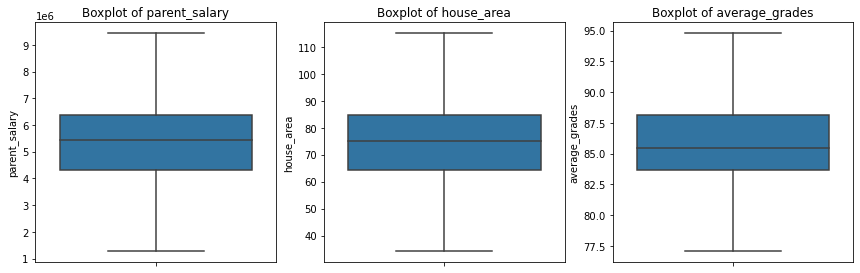

In [25]:
# Cek outliers menggunakan boxplot

plt.figure(figsize = (25, 15))

plt.subplot(3, 5, 1)
sns.boxplot(y = X_train_cap['parent_salary'])
plt.title('Boxplot of parent_salary')

plt.subplot(3, 5, 2)
sns.boxplot(y = X_train_cap['house_area'])
plt.title('Boxplot of house_area')

plt.subplot(3, 5, 3)
sns.boxplot(y = X_train_cap['average_grades'])
plt.title('Boxplot of average_grades')

plt.show ()

Hasil dari boxplot menunjukan bahwa sudah tidak ditemukan outliers

## Handling Missing Values

In [26]:
# Cek Missing Values Pada X_train

X_train.isnull ().sum ()

type_school             0
school_accreditation    0
interest                0
residence               0
parent_salary           0
house_area              0
average_grades          0
dtype: int64

In [27]:
# Cek Missing Values Pada X_test

X_test.isnull ().sum ()

type_school             0
school_accreditation    0
interest                0
residence               0
parent_salary           0
house_area              0
average_grades          0
dtype: int64

In [28]:
# Cek Missing Values Pada y_train

y_train.isnull ().sum ()

will_go_to_college    0
dtype: int64

In [29]:
# Cek Missing Values Pada y_test

y_test.isnull ().sum ()

will_go_to_college    0
dtype: int64

Tidak ditemukan missing values pada dataset

## Split between Numerical Columns and Categorical Columns

In [30]:
# Get Numerical Columns and Categorical Columns

num_columns= X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns= X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['parent_salary', 'house_area', 'average_grades']
Categorical Columns :  ['type_school', 'school_accreditation', 'interest', 'residence']


In [31]:
# Split Train-Set and Test-Set based on Column Type

X_train_num = X_train[num_columns]
X_train_cat_nom = X_train[['type_school']]
X_train_cat_ord = X_train[['school_accreditation', 'interest', 'residence']]

X_test_num = X_test[num_columns]
X_test_cat_nom = X_test[['type_school']]
X_test_cat_ord = X_test[['school_accreditation', 'interest', 'residence']]

## Feature Scaling

Karena kolom `parent_salary, house_area, average_grades` merupakan data yang terdistribusi secara normal, maka untuk Feature Scaling kita menggunakan `StandardScaler`

In [32]:
# Feature Scaling using MinMaxScaler

scaler_ss = StandardScaler()
scaler_ss.fit(X_train_num)

X_train_scaled = scaler_ss.transform(X_train_num)
X_test_scaled = scaler_ss.transform(X_test_num)

## Feature Encoding


Karena kolom `type_school` merupakan data categorical nominal karena tidak memiliki keterurutan, maka untuk Feature Encoding kita menggunakan `OneHotEncoder`

Karena kolom `school_accreditation, interest, residence` merupakan data categorical ordinal karena memiliki keterurutan, maka untuk Feature Encoding kita menggunakan `OrdinalEncoder`

In [33]:
# Feature Encoding using Ordinal Encoder

encoder_nom = OneHotEncoder()
                                     
encoder_nom.fit(X_train_cat_nom)

X_train_encoded_nom = encoder_nom.transform(X_train_cat_nom).toarray()
X_test_encoded_nom = encoder_nom.transform(X_test_cat_nom).toarray()

In [34]:
encoder_ord = OrdinalEncoder(categories=[['A', 'B'],
                                         ['Not Interested', 'Less Interested', 'Uncertain', 'Interested', 'Very Interested'],
                                         ['Rural', 'Urban']])
encoder_ord.fit(X_train_cat_ord)

X_train_encoded_ord = encoder_ord.transform(X_train_cat_ord)
X_test_encoded_ord = encoder_ord.transform(X_test_cat_ord)

## Concate Between Numerical Columns and Categorical Columns

In [35]:
# Concate Columns

X_train_final = np.concatenate([X_train_scaled, X_train_encoded_nom, X_train_encoded_ord], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test_encoded_nom, X_test_encoded_ord], axis=1)

In [36]:
# Create DataFrame of `X_train_final`

X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns+['type_school','type_school','school_accreditation', 'interest', 'residence']])
X_train_final_df

,parent_salary,house_area,average_grades,type_school,type_school,school_accreditation,interest,residence
0,0.509243,-2.605557,-0.748194,1.0,0.0,0.0,3.0,1.0
1,0.551781,-1.289551,-0.170689,0.0,1.0,0.0,4.0,1.0
2,-0.986689,0.394163,-0.562567,0.0,1.0,1.0,2.0,0.0
3,1.849201,1.071519,0.430386,1.0,0.0,1.0,4.0,1.0
4,1.331651,0.200633,0.946015,0.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...
787,-1.617675,-0.315448,-1.269715,1.0,0.0,1.0,4.0,0.0
788,-1.426252,0.613498,-0.123546,0.0,1.0,1.0,0.0,0.0
789,-0.859074,-1.734670,-1.249090,0.0,1.0,1.0,3.0,1.0
790,0.395807,0.013554,-0.344530,0.0,1.0,0.0,2.0,0.0


# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Notes :

- Algoritma Yang Akan Dipakai Adalah Logistic Regression

- Metrics Yang Akan Dipakai Untuk Mengevaluasi Adalah Confusion Matrix, Classification Report, dan ROC-AUC Score

In [37]:
# Define the Model

logreg = LogisticRegression()
randf = RandomForestClassifier(random_state = 20)
bagclf = BaggingClassifier(random_state = 20)
knn = KNeighborsClassifier()

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [38]:
# Train the Model

logreg.fit (X_train_final, y_train)
randf.fit (X_train_final, y_train)
bagclf.fit (X_train_final, y_train)
knn.fit (X_train_final, y_train)

KNeighborsClassifier()

## Cross Validation

In [39]:
scores = cross_val_score (logreg, X_train_final, y_train, cv = 5)
print ('Logistic Regression\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: ", (scores.mean()))
print ("Cross Validation Standard Deviation: ", (scores.std()))

Logistic Regression

Cross Validation Score:  [0.85534591 0.86792453 0.86708861 0.82911392 0.87341772]
Cross Validation Accuracy:  0.858578138683226
Cross Validation Standard Deviation:  0.015865582449522325


In [40]:
scores = cross_val_score (randf, X_train_final, y_train, cv = 5)
print ('Random Forest\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: ", (scores.mean()))
print ("Cross Validation Standard Deviation: ", (scores.std()))

Random Forest

Cross Validation Score:  [0.86792453 0.93081761 0.87341772 0.91139241 0.88607595]
Cross Validation Accuracy:  0.8939256428628294
Cross Validation Standard Deviation:  0.0237670171030847


In [41]:
scores = cross_val_score (knn, X_train_final, y_train, cv = 5)
print ('KNN (K - Nearest Neighbors)\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: ", (scores.mean()))
print ("Cross Validation Standard Deviation: ", (scores.std()))

KNN (K - Nearest Neighbors)

Cross Validation Score:  [0.86792453 0.88679245 0.91139241 0.89240506 0.86708861]
Cross Validation Accuracy:  0.8851206114162885
Cross Validation Standard Deviation:  0.016534351336242932


In [42]:
scores = cross_val_score (bagclf, X_train_final, y_train, cv = 5)
print ('Bagging Classification\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: ", (scores.mean()))
print ("Cross Validation Standard Deviation: ", (scores.std()))

Bagging Classification

Cross Validation Score:  [0.87421384 0.86792453 0.84177215 0.83544304 0.83544304]
Cross Validation Accuracy:  0.8509593185255951
Cross Validation Standard Deviation:  0.016700328756348602


Dari hasil cross validation yang memiliki accuracy tertinggi dengan standar deviasi yang terkecil adalah KNN

## Grid Search

In [43]:
param_knn = {'n_neighbors' : [5, 10, 15, 20, 25, 30],
             'weights'     : ['uniform', 'distance'],
             'algorithm'   : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size'   : [10, 20, 30]}

In [44]:
knn_gs = GridSearchCV (knn, param_grid = param_knn, cv = 5)

In [45]:
knn_gs.fit (X_train_final, y_train)
print("Best parameters: {}".format(knn_gs.best_params_))
print("Best cross-validation score: {}".format(knn_gs.best_score_))
print("Best estimator: {}".format(knn_gs.best_estimator_))

Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.8964811718812197
Best estimator: KNeighborsClassifier(leaf_size=10, weights='distance')


Parameter terbaik dengan model KNN adalah 'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## Cross Validation Before Grid Search

In [46]:
scores = cross_val_score (knn, X_train_final, y_train, cv = 5)
print ('KNN (K - Nearest Neighbors)\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: ", (scores.mean()))
print ("Cross Validation Standard Deviation: ", (scores.std()))

KNN (K - Nearest Neighbors)

Cross Validation Score:  [0.86792453 0.88679245 0.91139241 0.89240506 0.86708861]
Cross Validation Accuracy:  0.8851206114162885
Cross Validation Standard Deviation:  0.016534351336242932


## Cross Validation After Grid Search

In [47]:
scores = cross_val_score (knn_gs.best_estimator_, X_train_final, y_train, cv = 5)
print ('KNN (K - Nearest Neighbors)\n')
print ('Cross Validation Score: ', scores)
print ("Cross Validation Accuracy: ", (scores.mean()))
print ("Cross Validation Standard Deviation: ", (scores.std()))

KNN (K - Nearest Neighbors)

Cross Validation Score:  [0.88050314 0.89937107 0.91772152 0.89240506 0.89240506]
Cross Validation Accuracy:  0.8964811718812197
Cross Validation Standard Deviation:  0.012231357472881536


Dilihat dari hasil cross validation setelah dilakukan grid search, accuracy dari model meningkat sebesar 0.01 dan standar deviasinya menurun sebesar 0.004

## Logistic Regression

In [48]:
# Predict against Train-Set and Test-Set

y_pred_train_logreg = logreg.predict (X_train_final)
y_pred_test_logreg = logreg.predict (X_test_final)

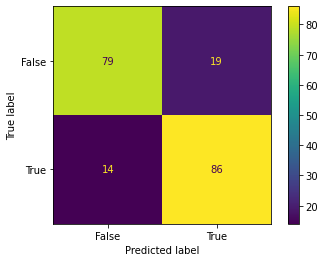

In [49]:
# Model Evaluation Using Confusion Matrix

cm_logreg = confusion_matrix (y_test, y_pred_test_logreg, labels = logreg.classes_)
disp_logreg = ConfusionMatrixDisplay (confusion_matrix = cm_logreg, display_labels = logreg.classes_)

disp_logreg.plot()
plt.show()

Dari 98 data aktual false, terdapat 79 data yang benar diprediksi false dan terdapat 19 data yang salah diprediksi false

Dari 100 data aktual true, terdapat 86 data yang benar diprediksi true dan terdapat 14 data yang salah diprediksi true

In [50]:
# Model Evaluation Using Classification Report

print (classification_report(y_test, y_pred_test_logreg))

              precision    recall  f1-score   support

       False       0.85      0.81      0.83        98
        True       0.82      0.86      0.84       100

    accuracy                           0.83       198
   macro avg       0.83      0.83      0.83       198
weighted avg       0.83      0.83      0.83       198



Jumlah data aktual false sebanyak 98 data dengan precision sebesar 85% dan recall 81% pada saat memprediksi false

Jumlah data aktual true sebanyak 132 data dengan precision sebesar 82% dan recall 86% pada saat memprediksi true

Secara keseluruhan ketepatan memprediksi data sebesar 83%

In [51]:
# Model Evaluation Using ROC-AUC

y_pred_proba_logreg = logreg.predict_proba(X_test_final)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
auc_logreg

0.9263265306122449

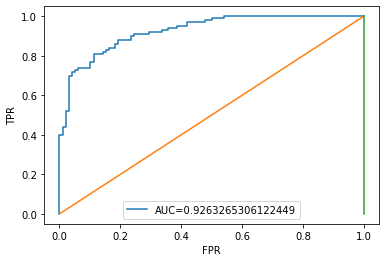

In [52]:
# Plot ROC-AUC 

plt.plot(fpr_logreg, tpr_logreg, label=f"AUC={auc_logreg}")
plt.plot([0,1],[0,1])
plt.plot([1,1],[0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()

Hasil score AUC adalah 0.92 artinya luas daerah di bawah kurva sebesar 0.92, berarti model ini termasuk ke dalam kategori excellent classification karena memiliki kinerja membedakan antara kelas + dan kelas -  sebesar 92%

## Random Forest

In [53]:
# Predict against Train-Set and Test-Set

y_pred_train_randf = randf.predict (X_train_final)
y_pred_test_randf = randf.predict (X_test_final)

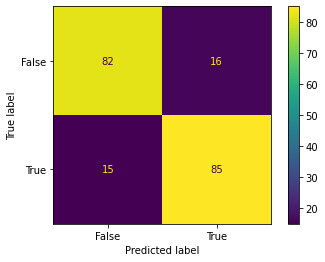

In [54]:
# Model Evaluation Using Confusion Matrix

cm_randf = confusion_matrix (y_test, y_pred_test_randf, labels = randf.classes_)
disp_randf = ConfusionMatrixDisplay (confusion_matrix = cm_randf, display_labels = randf.classes_)

disp_randf.plot ()

Dari 98 data aktual false, terdapat 82 data yang benar diprediksi false dan terdapat 16 data yang salah diprediksi false

Dari 100 data aktual true, terdapat 85 data yang benar diprediksi true dan terdapat 15 data yang salah diprediksi true

In [55]:
# Model Evaluation Using Classification Report

print (classification_report(y_test, y_pred_test_randf))

              precision    recall  f1-score   support

       False       0.85      0.84      0.84        98
        True       0.84      0.85      0.85       100

    accuracy                           0.84       198
   macro avg       0.84      0.84      0.84       198
weighted avg       0.84      0.84      0.84       198



Jumlah data aktual false sebanyak 98 data dengan precision sebesar 85% dan recall 84% pada saat memprediksi false

Jumlah data aktual true sebanyak 132 data dengan precision sebesar 84% dan recall 85% pada saat memprediksi true

Secara keseluruhan ketepatan memprediksi data sebesar 84%

In [56]:
# Model Evaluation Using ROC-AUC

y_pred_proba_randf = randf.predict_proba(X_test_final)[:, 1]
fpr_randf, tpr_randf, _ = roc_curve(y_test, y_pred_proba_randf)
auc_randf = roc_auc_score(y_test, y_pred_proba_randf)
auc_randf

0.9450510204081632

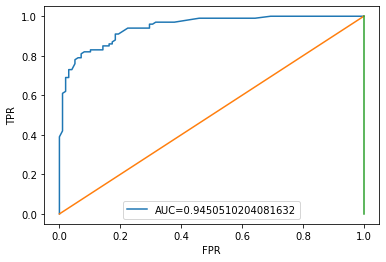

In [57]:
# Plot ROC-AUC 

plt.plot(fpr_randf, tpr_randf, label=f"AUC={auc_randf}")
plt.plot([0,1],[0,1])
plt.plot([1,1],[0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend ()

Hasil score AUC adalah 0.94 artinya luas daerah di bawah kurva sebesar 0.94, berarti model ini termasuk ke dalam kategori excellent classification karena memiliki akurasi dalam membedakan antara kelas + dan kelas - sebesar 94%

## Bagging Classifier

In [58]:
# Predict against Train-Set and Test-Set

y_pred_train_bagclf = bagclf.predict (X_train_final)
y_pred_test_bagclf = bagclf.predict (X_test_final)

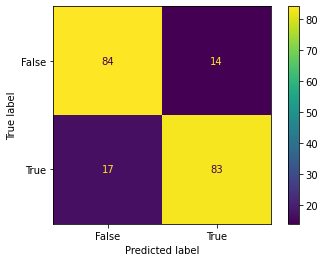

In [59]:
# Model Evaluation Using Confusion Matrix

cm_bagclf = confusion_matrix (y_test, y_pred_test_bagclf, labels = bagclf.classes_)
disp_bagclf = ConfusionMatrixDisplay (confusion_matrix = cm_bagclf, display_labels = bagclf.classes_)

disp_bagclf.plot()
plt.show()

Dari 98 data aktual false, terdapat 84 data yang benar diprediksi false dan terdapat 14 data yang salah diprediksi false

Dari 100 data aktual true, terdapat 83 data yang benar diprediksi true dan terdapat 17 data yang salah diprediksi true

In [60]:
# Model Evaluation Using Classification Report

print (classification_report(y_test, y_pred_test_bagclf))

              precision    recall  f1-score   support

       False       0.83      0.86      0.84        98
        True       0.86      0.83      0.84       100

    accuracy                           0.84       198
   macro avg       0.84      0.84      0.84       198
weighted avg       0.84      0.84      0.84       198



Jumlah data aktual false sebanyak 98 data dengan precision sebesar 83% dan recall 86% pada saat memprediksi false

Jumlah data aktual true sebanyak 132 data dengan precision sebesar 86% dan recall 83% pada saat memprediksi true

Secara keseluruhan ketepatan memprediksi data sebesar 84%

In [61]:
# Model Evaluation Using ROC-AUC

y_pred_proba_bagclf = bagclf.predict_proba(X_test_final)[:, 1]
fpr_bagclf, tpr_bagclf, _ = roc_curve(y_test, y_pred_proba_bagclf)
auc_bagclf = roc_auc_score(y_test, y_pred_proba_bagclf)
auc_bagclf

0.9015816326530612

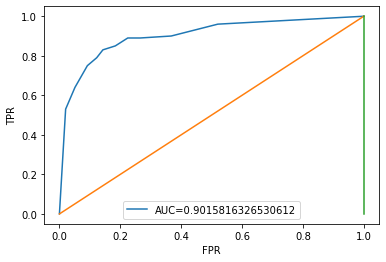

In [62]:
# Plot ROC-AUC 

plt.plot(fpr_bagclf, tpr_bagclf, label=f"AUC={auc_bagclf}")
plt.plot([0,1],[0,1])
plt.plot([1,1],[0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()

Hasil score AUC adalah 0.90 artinya luas daerah di bawah kurva sebesar 0.90, berarti model ini termasuk ke dalam kategori excellent classification karena memiliki akurasi dalam membedakan antara kelas + dan kelas - sebesar 90%

## KNN (K - Nearest Neighbors)

In [63]:
# Predict against Train-Set and Test-Set

y_pred_train_knn = knn.predict (X_train_final)
y_pred_test_knn = knn.predict (X_test_final)

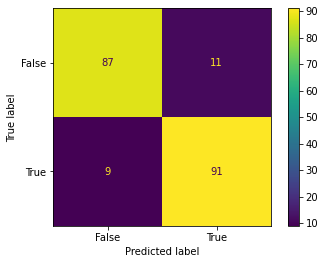

In [64]:
# Model Evaluation Using Confusion Matrix

cm_knn = confusion_matrix (y_test, y_pred_test_knn, labels = knn.classes_)
disp_knn = ConfusionMatrixDisplay (confusion_matrix = cm_knn, display_labels = knn.classes_)

disp_knn.plot()
plt.show()

Dari 98 data aktual false, terdapat 87 data yang benar diprediksi false dan terdapat 11 data yang salah diprediksi false

Dari 100 data aktual true, terdapat 91 data yang benar diprediksi true dan terdapat 9 data yang salah diprediksi true

In [65]:
# Model Evaluation Using Classification Report

print (classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

       False       0.91      0.89      0.90        98
        True       0.89      0.91      0.90       100

    accuracy                           0.90       198
   macro avg       0.90      0.90      0.90       198
weighted avg       0.90      0.90      0.90       198



Jumlah data aktual false sebanyak 98 data dengan precision sebesar 91% dan recall 89% pada saat memprediksi false

Jumlah data aktual true sebanyak 132 data dengan precision sebesar 89% dan recall 91% pada saat memprediksi true

Secara keseluruhan ketepatan memprediksi data sebesar 90%

In [66]:
# Model Evaluation Using ROC-AUC

y_pred_proba_knn = knn.predict_proba(X_test_final)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
auc_knn

0.9547448979591837

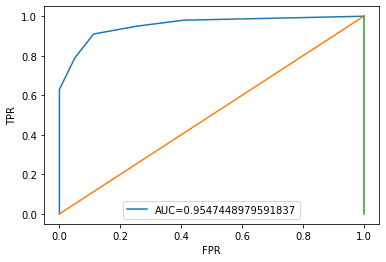

In [67]:
# Plot ROC-AUC 

plt.plot(fpr_knn, tpr_knn, label=f"AUC={auc_knn}")
plt.plot([0,1],[0,1])
plt.plot([1,1],[0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()

Hasil score AUC adalah 0.95 artinya luas daerah di bawah kurva sebesar 0.95, berarti model ini termasuk ke dalam kategori fair classification karena memiliki kinerja membedakan antara kelas + dan kelas -  sebesar 95%

## KNN (K - Nearest Neighbors) After Grid Search

In [68]:
# Predict against Train-Set and Test-Set

y_pred_train_knn_gs = knn_gs.best_estimator_.predict (X_train_final)
y_pred_test_knn_gs = knn_gs.best_estimator_.predict (X_test_final)

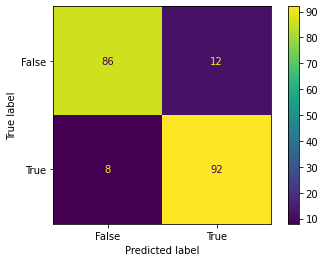

In [69]:
# Model Evaluation Using Confusion Matrix

cm_knn_gs = confusion_matrix (y_test, y_pred_test_knn_gs, labels = knn_gs.best_estimator_.classes_)
disp_knn_gs = ConfusionMatrixDisplay (confusion_matrix = cm_knn_gs, display_labels = knn_gs.best_estimator_.classes_)

disp_knn_gs.plot()
plt.show()

Dari 98 data aktual false, terdapat 86 data yang benar diprediksi false dan terdapat 12 data yang salah diprediksi false

Dari 100 data aktual true, terdapat 92 data yang benar diprediksi true dan terdapat 8 data yang salah diprediksi true

In [70]:
# Model Evaluation Using Classification Report

print (classification_report(y_test, y_pred_test_knn_gs))

              precision    recall  f1-score   support

       False       0.91      0.88      0.90        98
        True       0.88      0.92      0.90       100

    accuracy                           0.90       198
   macro avg       0.90      0.90      0.90       198
weighted avg       0.90      0.90      0.90       198



Jumlah data aktual false sebanyak 98 data dengan precision sebesar 91% dan recall 88% pada saat memprediksi false

Jumlah data aktual true sebanyak 132 data dengan precision sebesar 88% dan recall 92% pada saat memprediksi true

Secara keseluruhan ketepatan memprediksi data sebesar 90%

In [71]:
# Model Evaluation Using ROC-AUC

y_pred_proba_knn_gs = knn_gs.best_estimator_.predict_proba(X_test_final)[:, 1]
fpr_knn_gs, tpr_knn_gs, _ = roc_curve(y_test, y_pred_proba_knn_gs)
auc_knn_gs = roc_auc_score(y_test, y_pred_proba_knn_gs)
auc_knn_gs

0.9568367346938776

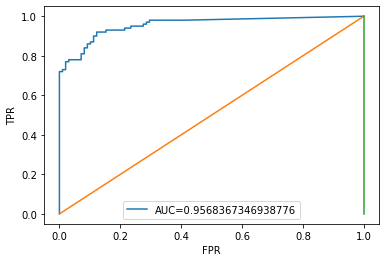

In [72]:
# Plot ROC-AUC 

plt.plot(fpr_knn_gs, tpr_knn_gs, label=f"AUC={auc_knn_gs}")
plt.plot([0,1],[0,1])
plt.plot([1,1],[0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()

Hasil score AUC adalah 0.95 artinya luas daerah di bawah kurva sebesar 0.95, berarti model ini termasuk ke dalam kategori fair classification karena memiliki kinerja membedakan antara kelas + dan kelas -  sebesar 95%

# 9 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

## Make Pipeline

In [73]:
num_col = ['parent_salary', 'house_area', 'average_grades']
cat_nom = ['type_school']
cat_ord = ['school_accreditation', 'interest', 'residence']

preprocessing = ColumnTransformer ([('normal', StandardScaler (), num_col),
                                    ('nominal', OneHotEncoder (), cat_nom),
                                    ('ordinal', OrdinalEncoder (), cat_ord)])

In [74]:
pipe_knn_gs = Pipeline ([('capping', Winsorizer ()),
                         ('prep', preprocessing),
                         ('model', KNeighborsClassifier (leaf_size=10, weights='distance'))])

In [75]:
pipe_knn_gs.fit (X_train, y_train)

Pipeline(steps=[('capping', Winsorizer()),
                ('prep',
                 ColumnTransformer(transformers=[('normal', StandardScaler(),
                                                  ['parent_salary',
                                                   'house_area',
                                                   'average_grades']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['type_school']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['school_accreditation',
                                                   'interest',
                                                   'residence'])])),
                ('model',
                 KNeighborsClassifier(leaf_size=10, weights='distance'))])

## Model Saving

In [76]:
# Save Model Pipeline

with open("model.pkl", "wb") as model_file:
    pickle.dump(pipe_knn_gs, model_file)

## Predict Using Pipeline

In [77]:
# Display data_inf

data_inf

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,B,Female,Very Interested,Rural,50,7540000,96.5,91.84,True,True
1,Academic,B,Male,Not Interested,Urban,55,5010000,86.3,82.13,False,True
2,Vocational,A,Male,Interested,Rural,45,7370000,79.2,86.31,True,True
3,Academic,B,Female,Uncertain,Rural,45,6270000,71.0,89.08,True,True
4,Vocational,A,Female,Very Interested,Urban,53,5420000,79.0,87.37,False,True
5,Academic,B,Male,Less Interested,Urban,57,5080000,88.1,83.57,False,False
6,Academic,B,Male,Not Interested,Rural,46,7200000,76.0,92.99,True,True
7,Academic,A,Female,Uncertain,Urban,58,5060000,62.1,88.85,False,False
8,Vocational,B,Male,Uncertain,Urban,57,4030000,77.8,83.34,True,False
9,Academic,B,Female,Less Interested,Urban,50,3360000,63.5,84.98,True,False


In [78]:
# Split between `X` (Features) and `y` (Target)

X_inf = data_inf[['type_school', 'school_accreditation', 'interest', 'residence', 'parent_salary', 'house_area', 'average_grades']]
y_inf = data_inf[['will_go_to_college']]

In [79]:
y_pred_inf_pipe = pipe_knn_gs.predict (X_inf)
y_pred_inf_pipe

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False])

In [80]:
# Create Dataframe of Prediction-Set

y_pred_inf_df_pipe = pd.DataFrame(y_pred_inf_pipe, columns=['Prediction'])
y_pred_inf_df_pipe

,Prediction
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,False
9,False


In [81]:
# Concate Between Inference-Set And Prediction-Set

pd.concat([data_inf, y_pred_inf_df_pipe], axis=1)

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,Prediction
0,Academic,B,Female,Very Interested,Rural,50,7540000,96.5,91.84,True,True,True
1,Academic,B,Male,Not Interested,Urban,55,5010000,86.3,82.13,False,True,True
2,Vocational,A,Male,Interested,Rural,45,7370000,79.2,86.31,True,True,True
3,Academic,B,Female,Uncertain,Rural,45,6270000,71.0,89.08,True,True,True
4,Vocational,A,Female,Very Interested,Urban,53,5420000,79.0,87.37,False,True,True
5,Academic,B,Male,Less Interested,Urban,57,5080000,88.1,83.57,False,False,True
6,Academic,B,Male,Not Interested,Rural,46,7200000,76.0,92.99,True,True,True
7,Academic,A,Female,Uncertain,Urban,58,5060000,62.1,88.85,False,False,True
8,Vocational,B,Male,Uncertain,Urban,57,4030000,77.8,83.34,True,False,False
9,Academic,B,Female,Less Interested,Urban,50,3360000,63.5,84.98,True,False,False


# 10 - Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

1. Narasi based on EDA

Jika dilihat dari grafik, orang yang lanjut kuliah memiliki rata - rata house_area, average_grades, parent_salary yang lebih besar

Jika dilihat dari nilai minimal, orang yang lanjut kuliah memiliki average_grades sebesar 75 mungkin ini standar nilai rata-rata agar bisa lanjut kuliah dan parent_salary sebesar 1000000 mungkin ini standar biaya agar bisa membayar perkuliahan

Dan ternyata orang yang mempunyai average_grades dan parent_salary yang lebih dari minimal belum tentu lanjut kuliah 

Ternyata orang yang mempunyai `interest` tinggi, kenyataanya belum tentu lanjut kuliah, bisa dilihat pada kasus `Interested` yang seharusnya berminat lanjut kuliah tetapi pada kenyataannya lebih banyak yang tidak lanjut kuliah

Namun orang yang mempunyai `interest` rendah, kenyataanya belum tentu tidak lanjut kulia, bisa dilihat pada kasus `Not Interested` yang seharusnya tidak berminat lanjut kuliah tetapi pada kenyataanya lebih banyak yang lanjut kuliah 

Ternyata orang yang `Very Interested` untuk lanjut kuliah tidak memiliki rata-rata nilai yang tinggi, melainkan orang yang `Not Interested` untuk lanjut kuliah memiliki rata-rata nilai yang lebih tinggi

Orang yang tinggal di Rural (pedesaan) memiliki rata-rata nilai yang lebih tinggi

Orang yang bersekolah di sekolah Academic memiliki rata-rata nilai yang lebih tingg

Orang yang bersekolah di sekolah dengan akreditasi B memiliki rata-rata nilai yang lebih tinggi

Berdasarkan grafik, dapat diketahui bahwa data kita masih tergolong balance karena memiliki persentase data yang sama yaitu 50% :50%

2. Narasi based on Model Evaluation

Dari 4 model yang ada, semua model termasuk ke kategori excellent classification karena memiliki akurasi dalam membedakan antara kelas + dan kelas - lebih besar dari 90%

Setelah dilakukan grid search pada model KNN, hasil cross validation menunjukkan accuracy dari model meningkat sebesar 0.01 dan standar deviasinya menurun sebesar 0.004

3. Narasi based on Model Analysis

Dari ke - 4 model yang dipakai tidak ada model yang yang jelek karena semua model memiliki akurasi di atas 90% berdasarkan AUC Score

Model yang paling baik diantara 4 model tersebut adalah KNN dengan nilai ROC-AUC Score sebesar 0.95 yang berarti model tersebut memiliki kinerja membedakan antara kelas + dan kelas - sebesar 95%

4. Further Improvement

Mungkin agar lebih sempurna, pada model bisa lebih mengoptimalkan hyperparameter yang dipakai dengan mencoba dari trial and error menggunakan hyperparameter yang lain yang pengaplikasiannya lebih tepat pada dataset yang kita gunakan